## Seaborn

Seaborn is a library for making statistical graphics in Python. It is built on top of matplotlib and closely integrated with pandas data structures.


Import `seaborn` under the alias `sns`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Example Plotting a distribution

We will create 6 random distributions and plot in matplotlib and then seaborn, seeing what using seaborn on matplotlib outputs can do.

In [2]:
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 100)
y = np.cumsum(rng.randn(100, 6), 0)

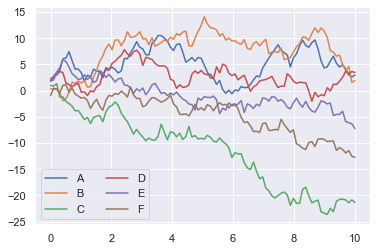

In [6]:
## using matplotlib

plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='lower left')
plt.show()

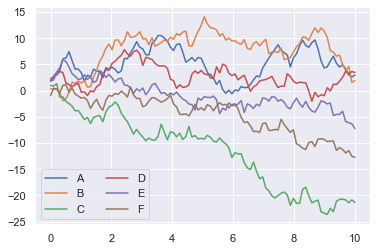

In [8]:
## using seaborn, which can overwrite Matplotlib's default parameters 
## and in turn get even simple Matplotlib scripts to produce vastly superior output

sns.set() #overlay on top of matplot lib to "seaborn-ize" the plot
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='lower left');

## Seaborn plot types

### Scatterplot

`regplot()` can be used to build a scatterplot.

Pass a numeric column of a data frame to both the x and y variable and the function will handle the rest.

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

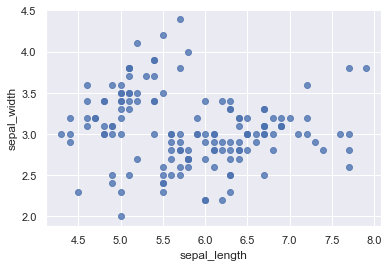

In [10]:
iris_df = sns.load_dataset('iris')
sns.regplot(x = iris_df["sepal_length"], y = iris_df["sepal_width"], fit_reg = False) # fitreg for optional regression line

## fit_reg = False will remove the default regression line

#### Customize markers

To change the shape of the marker, specify

- `marker`: the shape of the marker (see list in the following section)


In [11]:
## all the available markers

from matplotlib import markers
all_shapes = markers.MarkerStyle.markers.keys()
all_shapes

dict_keys(['.', ',', 'o', 'v', '^', '<', '>', '1', '2', '3', '4', '8', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_', 'P', 'X', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 'None', None, ' ', ''])

#### Changing Color, Transparency and Size of Markers
You can also change the other features of markers in a plot. The following arguments must be provided inside of a kwargs argument called `scatter_kws{...}`:

- `color`: color of the markers <br>
- `alpha`: opacity of the markers <br>
- `s`: size of the markers

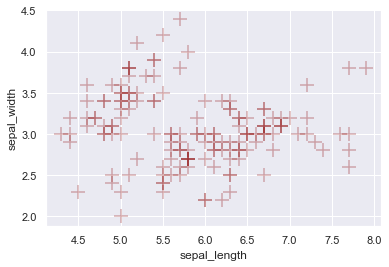

In [12]:
# can also change shape of marker by column variable
sns.regplot(x = iris_df["sepal_length"], y = iris_df["sepal_width"], 
            fit_reg = False, scatter_kws = {"color":"darkred", "alpha":0.3, "s":200}, marker = "+")
plt.show()

#### Map a color per group
This example uses `lmplot()` function of seaborn library. In order to define each species with different colors, species column of the dataset given in hue argument. The list of arguments needed for the function is:

- `x`: positions of points on the X axis <br>
- `y`: positions of points on the Y axis <br>
- `data`: dataset <br>
- `fit_reg`: if True, show the linear regression fit line <br>
- `hue`: variables that define subsets of the data <br>
- `legend`: if True, add a legend <br>
- `markers`: a list of marker shapes if you wish to make 1 unique marker per shape <br>

Note: the legend is specified in through matplotlib, instead of seaborn itself. In order to specifically define a location of the legend, `plt.legend()` can be used.

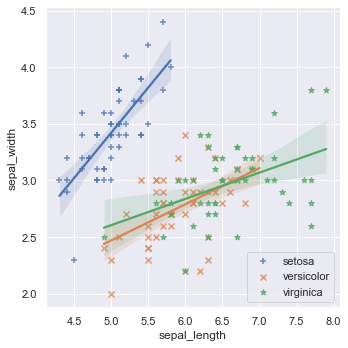

In [14]:
# make sure you specify marker type in list to correspond to variables in hue
sns.lmplot( x = "sepal_length", y = "sepal_width", data = iris_df, fit_reg = True, 
           hue = 'species', legend = False, markers = ["+", "x", "*"])
plt.legend(loc = 'lower right')
plt.show()

#### Controlling color in seaborn

Use embedded color palettes in seaborn.  Specify with argument: `palette = `.

If you want to control the colors directly you will do so by specifying a dictionary in the `palette` argument mapping hue levels to matplotlib colors.

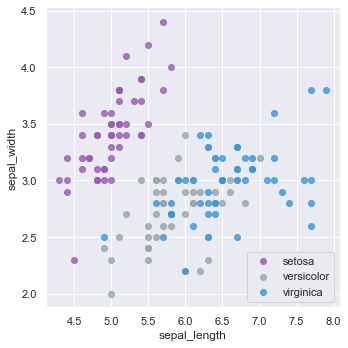

In [16]:
sns.lmplot( x = "sepal_length", y = "sepal_width", data = iris_df, fit_reg = False, 
           hue = "species", legend = False, 
           palette = dict(setosa = "#9b59b6", virginica = "#3498db", versicolor = "#95a5a6"))
plt.legend(loc = "lower right")
plt.show()

#### Adding x-, y- axis labels and title

- `plt.title()`

- `plt.xlabel()`

- `plt.ylabel()`


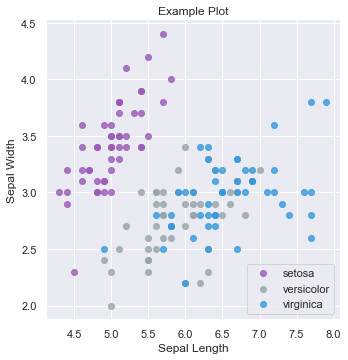

In [17]:
sns.lmplot( x = "sepal_length", y = "sepal_width", data = iris_df, fit_reg = False, 
           hue = "species", legend = False, 
           palette = dict(setosa = "#9b59b6", virginica = "#3498db", versicolor = "#95a5a6"))
plt.legend(loc = "lower right")
plt.title('Example Plot')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

#### Composite views onto multivariate datasets

Some seaborn functions combine multiple kinds of plots to quickly give informative summaries of a dataset. One, `jointplot()`, focuses on a single relationship. It plots the joint distribution between two variables along with each variable’s marginal distribution:

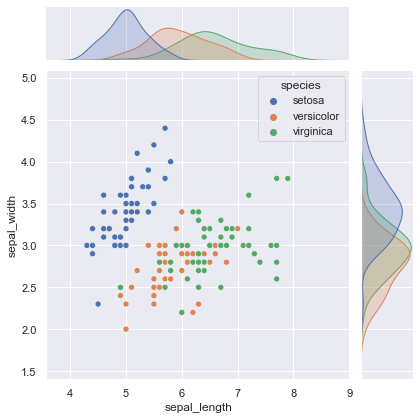

In [18]:
sns.jointplot(x = "sepal_length", y = "sepal_width", data = iris_df,
              hue = "species")

`pairplot()`, takes a broader view: it shows joint and marginal distributions for all pairwise relationships and for each variable, respectively.

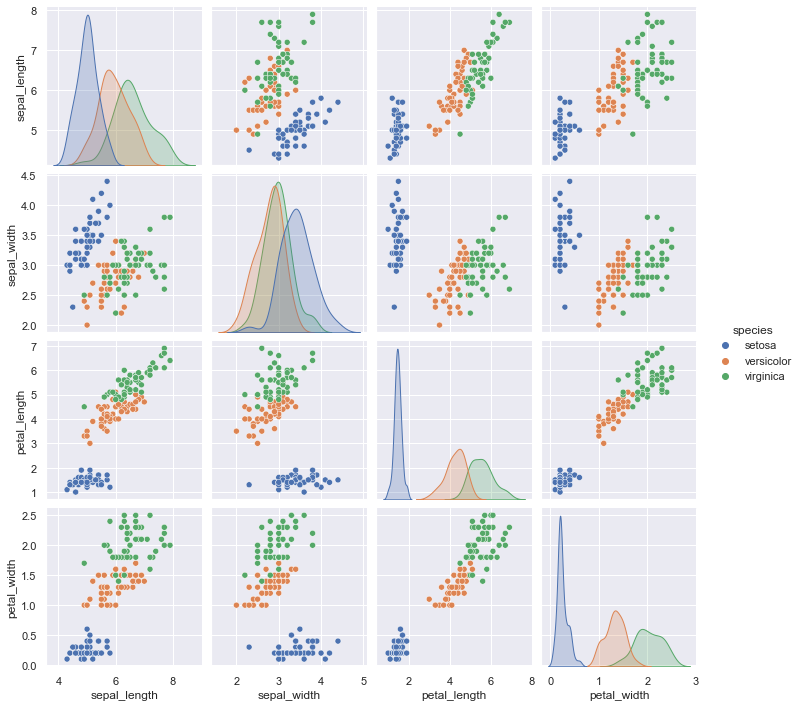

In [19]:
sns.pairplot(data = iris_df, hue = "species")

#### Exercise:

Load the "tips" dataset from Seaborn package.  Using a scatterplot, plot `total_bill` on the x axis and `tip` on the y axis.  Do not show the `fit_reg` line.  Include coloring based on `sex` of the tipper.  Add x-, y-axis labels and a title.

Text(0.5, 22.959999999999972, 'Total Bill')

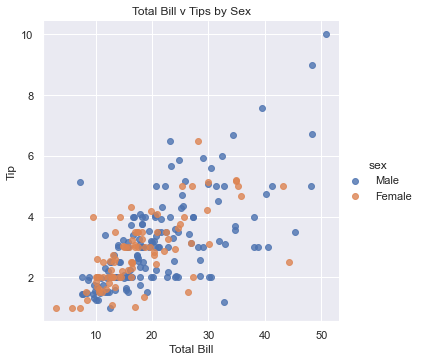

In [22]:
tips_df = sns.load_dataset('tips')
tips_df
p = sns.lmplot(x="total_bill", y="tip", data=tips_df, fit_reg=False, hue="sex")
plt.title("Total Bill v Tips by Sex")
plt.ylabel("Tip")
plt.xlabel("Total Bill")

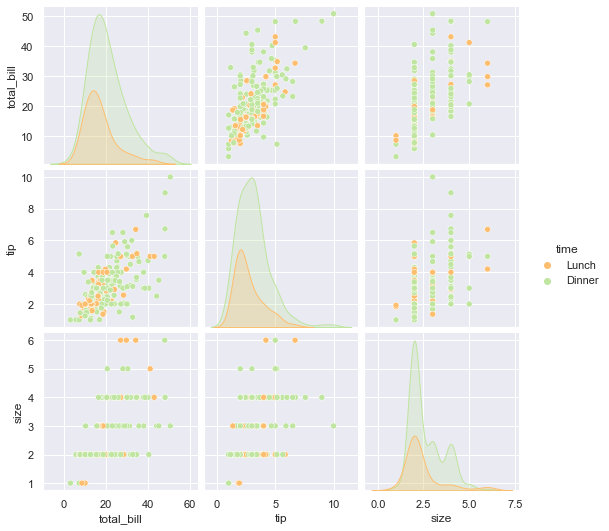

In [25]:
sns.pairplot(tips_df, hue = "time", palette = "Spectral")

### Histograms

A histogram is a classic visualization tool that represents the distribution of one or more variables by counting the number of observations that fall within disrete bins.

This function can normalize the statistic computed within each bin to estimate frequency, density or probability mass, and it can add a smooth curve obtained using a kernel density estimate, similar to kdeplot().

Parameters:

- `data`: pandas dataframe, numpy array, mapping or sequence
<br>

- `x, y`: vectors or keys in data; varaibles that specify positions on the  x and y axes
<br>

- `hue`: vector or key in data; semantic variable mapped to determine the color of plot elements
<br>

- `weights`: vector or key in data that provides the contribution of the corresponding data points towards the count in each bin by these factors.
<br>

- `stat = {“count”, “frequency”, “density”, “probability”}`: y axis measurement.  count will show # of observations, frequency shows count/bin width, density normalizes counts so the area is 1, probability normalizes counts so the sum of bar is 1
<br>

- `bins`: string, number, vector, or a pair of such values; a generic bin parameter that can be the name of a reference rule, the number of bins, or the breaks of the bins. Passed to numpy.histogram_bin_edges().
<br>

- `binwidth`: number or pair of numbers; width of each bin, overrides bins but can be used with binrange.

#### Example:

Using the `Seaborn` dataset `penguins`, plot the density distribution of `body_mass_g` using 30 bins.

<AxesSubplot:xlabel='body_mass_g', ylabel='Density'>

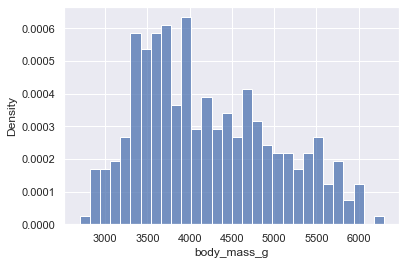

In [26]:
penguins_df = sns.load_dataset("penguins")
sns.histplot(data = penguins_df, x = "body_mass_g", stat = "density", bins = 30)

Add a kernel density estimate to smooth the histogram, providing complementary information about the shape of the distribution.  Argument: `kde = True`

<AxesSubplot:xlabel='body_mass_g', ylabel='Density'>

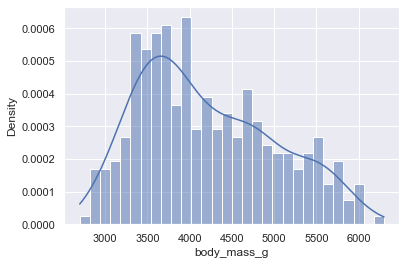

In [27]:
sns.histplot(data = penguins_df, x = "body_mass_g", stat = "density", bins = 30, kde = True)

You can otherwise draw multiple histograms from a long-form dataset with hue mapping.

<AxesSubplot:xlabel='body_mass_g', ylabel='Density'>

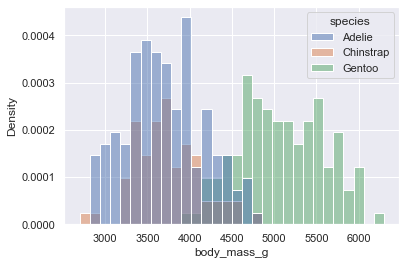

In [28]:
sns.histplot(data = penguins_df, x = "body_mass_g", stat = "density", 
             bins = 30, hue = "species")

Overlapping bars can be hard to visually resolve. A different approach would be to draw a step function.


<AxesSubplot:xlabel='body_mass_g', ylabel='Density'>

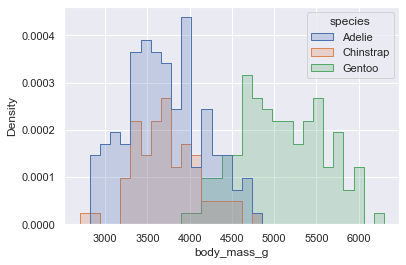

In [29]:
sns.histplot(data = penguins_df, x = "body_mass_g", stat = "density", 
             bins = 30, hue = "species", element = "step")

You can also add facets based on subsets of data.


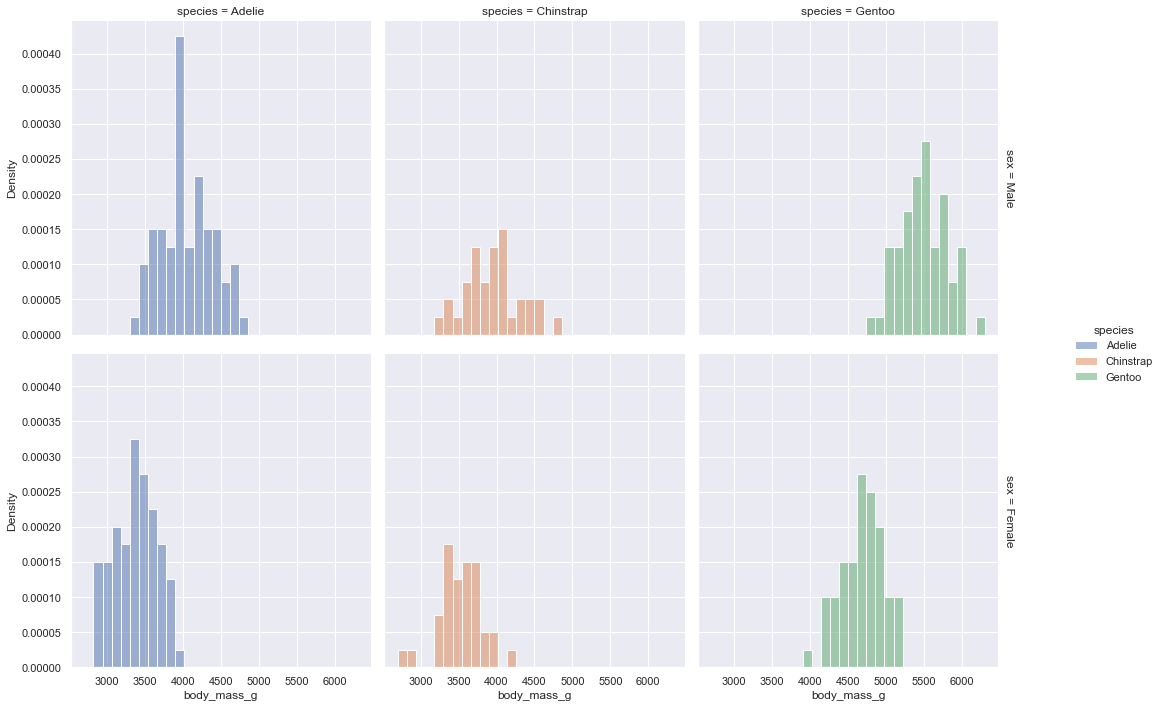

In [30]:
sns.displot(data = penguins_df, x = "body_mass_g", stat = "density", 
            bins = 30, hue = "species", row = "sex", col = "species",
            facet_kws = dict(margin_titles = True))

#### Exercise

Load the `tips` dataset from Seaborn package. Using a histogram, plot `tip` on the x-axis and count on y-axis.  Facet the histogram using `day` for the columns and `time` for the rows.  Colorize based on `sex`.  Use 15 bins.

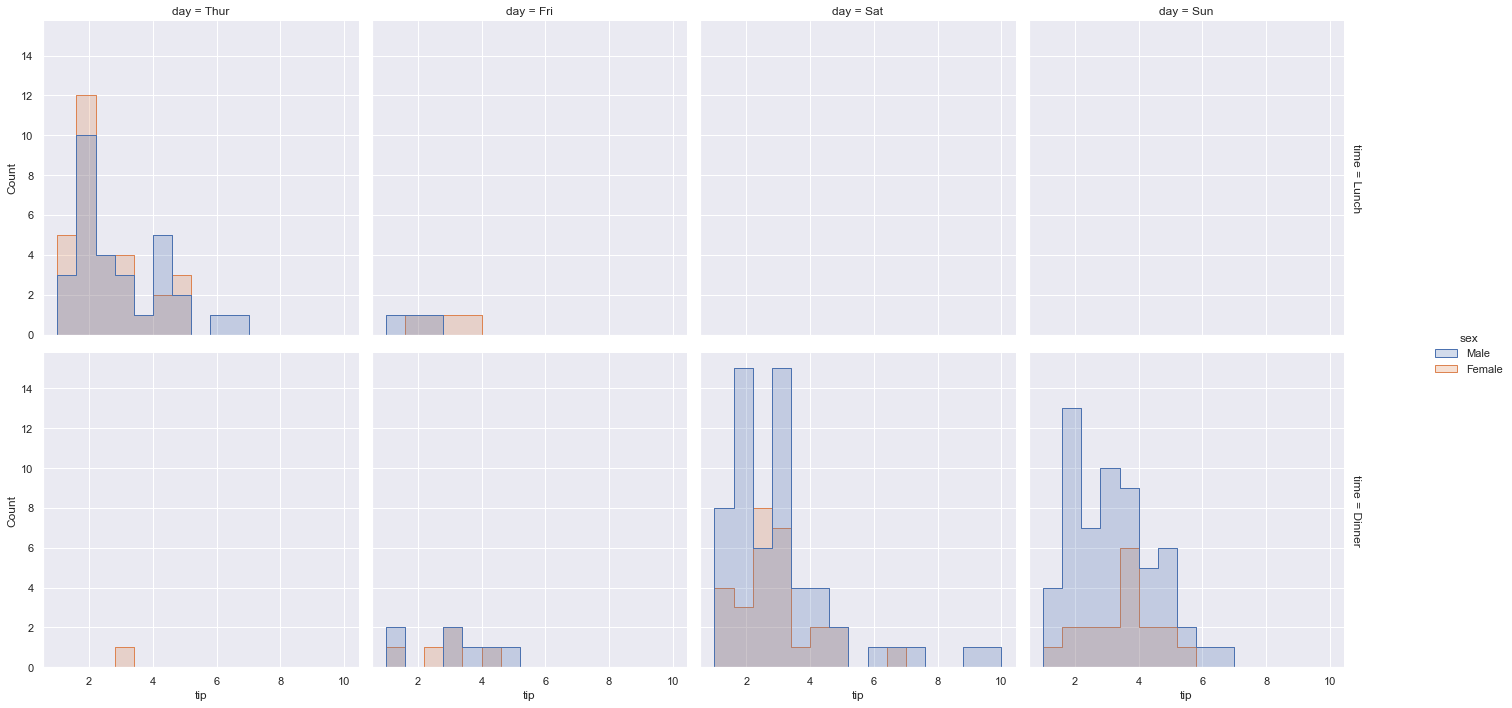

In [34]:
tips_df = sns.load_dataset('tips')
tips_df
sns.displot(data=tips_df, x="tip", stat= "count", bins=15, hue="sex", row="time", col="day", facet_kws=dict(margin_titles = True), element = "step")

### Boxplots

A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

This function always treats one of the variables as categorical and draws data at ordinal positions (0, 1, … n) on the relevant axis, even when the data has a numeric or date type.


Syntax: `sns.boxplot()`

Arguments:
- `x =`, `y =`, `hue =`: varaibles in data or vector data that are inputs for plotting

- `data =`: dataframe, array or list that stores the data

- `order =`, `hue_order =`: order to plot the categorical levels in

- `orient = {"v"|"h"}` = orientation of the boxplot

- `color =`: color for the elements or seend for palette

- `palette =`: palette name, list or dictionary; colors used for the different levels of the hue variable

#### Example:

Using the penguins dataset, create a boxplot to show tip (y-axis) by day of the week (x-axis) and time (hue).

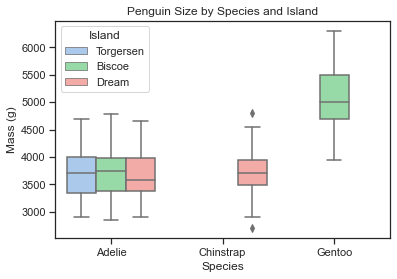

In [35]:
penguins_df = sns.load_dataset("penguins")
sns.set_theme(style="ticks", palette="pastel")

sns.boxplot(y = "body_mass_g", x = "species", hue = "island", palette = ["b", "g", "r"], data = penguins_df)
plt.legend(loc = "upper left", title = "Island")
plt.title('Penguin Size by Species and Island')
plt.xlabel('Species')
plt.ylabel('Mass (g)')
plt.show()

#### Exercise:

Using the `tips` dataset, draw a boxplot to show `tip` (y-axis) by `day` of the week (x-axis) and `time` (hue).
    

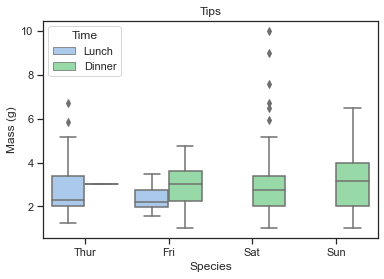

In [36]:
tips_df = sns.load_dataset("tips")
sns.set_theme(style="ticks", palette="pastel")

sns.boxplot(y = "tip", x = "day", hue = "time", palette = ["b", "g", "r"], data = tips_df)
plt.legend(loc = "upper left", title = "Time")
plt.title('Tips')
plt.xlabel('Species')
plt.ylabel('Mass (g)')
plt.show()

More examples:  https://seaborn.pydata.org/examples/index.html